In [45]:

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix



In [46]:
data = pd.read_csv('C:/Users/Sripragna/Downloads/train.csv')  # Replace with your dataset file path
# Handle missing values
data = data.dropna(subset=['text'])
print(data)


          id                                              title  \
0          0  House Dem Aide: We Didn’t Even See Comey’s Let...   
1          1  FLYNN: Hillary Clinton, Big Woman on Campus - ...   
2          2                  Why the Truth Might Get You Fired   
3          3  15 Civilians Killed In Single US Airstrike Hav...   
4          4  Iranian woman jailed for fictional unpublished...   
...      ...                                                ...   
20795  20795  Rapper T.I.: Trump a ’Poster Child For White S...   
20796  20796  N.F.L. Playoffs: Schedule, Matchups and Odds -...   
20797  20797  Macy’s Is Said to Receive Takeover Approach by...   
20798  20798  NATO, Russia To Hold Parallel Exercises In Bal...   
20799  20799                          What Keeps the F-35 Alive   

                                          author  \
0                                  Darrell Lucus   
1                                Daniel J. Flynn   
2                             Consortiu

In [47]:
X = data['text']  # Text column containing the news articles
y = data['label']  # Label column containing the news labels (fake or real)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [48]:
# Initialize the TfidfVectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the training data
X_train_vectors = vectorizer.fit_transform(X_train)

# Transform the testing data
X_test_vectors = vectorizer.transform(X_test)


In [49]:
# Initialize the Multinomial Naive Bayes classifier
classifier = MultinomialNB()

# Train the classifier
classifier.fit(X_train_vectors, y_train)


MultinomialNB()

In [50]:
# Make predictions on the testing data
y_pred = classifier.predict(X_test_vectors)
print(y_pred)
print(y_test)


[1 1 1 ... 0 0 0]
14474    1
9606     1
14662    1
6451     0
16590    0
        ..
10891    1
6207     1
1948     0
17431    0
8049     1
Name: label, Length: 4153, dtype: int64


In [51]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Display confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(confusion_mat)


Accuracy: 0.846616903443294
Confusion Matrix:
[[2059   20]
 [ 617 1457]]


In [52]:
# Example news article text
new_article = "Breaking News: Scientists discover a cure for cancer! After years of research and experiments, a team of scientists has finally developed a breakthrough treatment that can completely cure cancer. This groundbreaking discovery is set to revolutionize the medical field and save millions of lives. Clinical trials have shown incredible success rates with patients experiencing complete remission. The treatment is expected to be available to the public within the next year. This remarkable achievement brings hope to cancer patients and their families worldwide."


# Transform the new article using the TfidfVectorizer
new_article_vector = vectorizer.transform([new_article])

# Make prediction
prediction = classifier.predict(new_article_vector)

# Print the predicted label
if prediction[0] == 'fake':
    print("The news article is predicted to be fake.")
else:
    print("The news article is predicted to be real.")

The news article is predicted to be real.


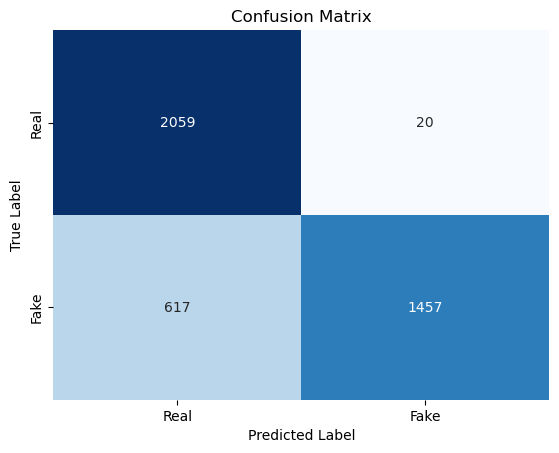

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

# Create heatmap
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


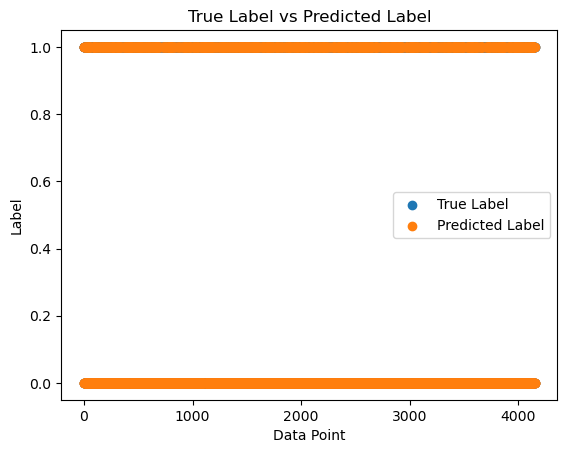

In [54]:
import matplotlib.pyplot as plt


# Create scatter plot
plt.scatter(range(len(y_test)), y_test, label='True Label')
plt.scatter(range(len(y_test)), y_pred, label='Predicted Label')

plt.xlabel("Data Point")
plt.ylabel("Label")
plt.title("True Label vs Predicted Label")
plt.legend()
plt.show()

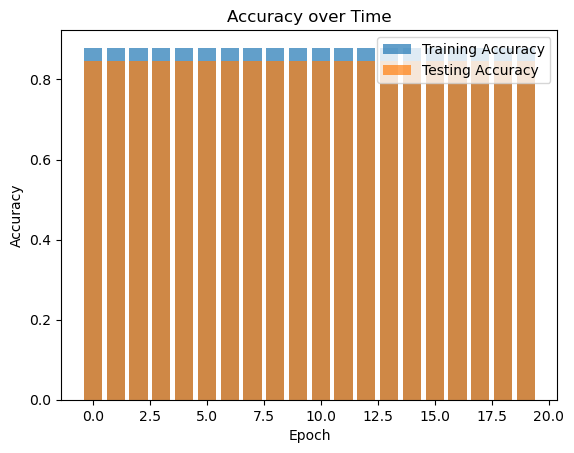

In [55]:
import matplotlib.pyplot as plt
import numpy as np

# Lists to store accuracy scores during training
train_accuracy = []
test_accuracy = []
num_epochs=20

# Iterate over a range of epochs or iterations during training
for epoch in range(num_epochs):
    # Perform training and testing steps
    
    # Calculate accuracy for each epoch
    train_acc = accuracy_score(y_train, classifier.predict(X_train_vectors))
    test_acc = accuracy_score(y_test, classifier.predict(X_test_vectors))
    
    # Append accuracy scores to lists
    train_accuracy.append(train_acc)
    test_accuracy.append(test_acc)

# Set the x-axis ticks and labels
x_ticks = np.arange(num_epochs)
x_labels = [str(epoch) for epoch in x_ticks]

# Plot the accuracy bar plot
plt.bar(x_ticks, train_accuracy, label='Training Accuracy', alpha=0.7)
plt.bar(x_ticks, test_accuracy, label='Testing Accuracy', alpha=0.7)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy over Time')
plt.legend()
plt.show()
